<a href="https://colab.research.google.com/github/SidharthBhakth/Image-Classification-with-ConvNets-in-TF-2.x/blob/master/2_CIFAR_10_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIFAR-10 classification

Image classification on CIFAR-10 dataset using a 2D convolutional neural network with batch normalization and data augmentation.

In [0]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
# Load in the data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize feature matrix
X_train, X_test = X_train / 255.0 , X_test / 255.0

# Flatten labels
y_train, y_test = y_train.flatten(), y_test.flatten()

In [3]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000,)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000,)


In [4]:
# Number of classes
K = len(set(y_train))
print("Number of classes: {}".format(K))

Number of classes: 10


In [0]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [0]:
# Build the model (using keras functional API)

i = Input(shape=X_train[0].shape)

x = Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)

x = Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)

x = Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)

x = Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)

x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)

x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [7]:
# Compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Fit
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Epoch 1/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.3060 - accuracy: 0.5490 - val_loss: 1.0689 - val_accuracy: 0.6248
Epoch 2/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8474 - accuracy: 0.7046 - val_loss: 0.8945 - val_accuracy: 0.7002
Epoch 3/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6928 - accuracy: 0.7606 - val_loss: 0.7474 - val_accuracy: 0.7462
Epoch 4/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.5823 - accuracy: 0.8000 - val_loss: 0.7297 - val_accuracy: 0.7547
Epoch 5/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.4927 - accuracy: 0.8323 - val_loss: 0.6101 - val_accuracy: 0.8048
Epoch 6/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.4168 - accuracy: 0.8570 - val_loss: 0.7267 - val_accuracy: 0.7736
Epoch 7/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.3549 - accuracy: 0.8779 - val_loss: 0.6115 - val_ac

In [8]:
# Fit model with real time data augmentation 
data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(X_train, y_train, batch_size=32)

r = model.fit(train_generator, validation_data=(X_test, y_test), steps_per_epoch=X_train.shape[0]/32, epochs=50)

Epoch 1/50
1563/1562 [==============================] - 26s 17ms/step - loss: 0.5551 - accuracy: 0.8237 - val_loss: 0.5785 - val_accuracy: 0.8118
Epoch 2/50
1563/1562 [==============================] - 26s 17ms/step - loss: 0.4372 - accuracy: 0.8566 - val_loss: 0.4565 - val_accuracy: 0.8440
Epoch 3/50
1563/1562 [==============================] - 26s 17ms/step - loss: 0.4061 - accuracy: 0.8646 - val_loss: 0.4378 - val_accuracy: 0.8552
Epoch 4/50
1563/1562 [==============================] - 26s 17ms/step - loss: 0.3785 - accuracy: 0.8744 - val_loss: 0.4693 - val_accuracy: 0.8469
Epoch 5/50
1563/1562 [==============================] - 26s 17ms/step - loss: 0.3635 - accuracy: 0.8775 - val_loss: 0.4648 - val_accuracy: 0.8547
Epoch 6/50
1563/1562 [==============================] - 26s 17ms/step - loss: 0.3485 - accuracy: 0.8833 - val_loss: 0.4338 - val_accuracy: 0.8581
Epoch 7/50
1563/1562 [==============================] - 26s 17ms/step - loss: 0.3317 - accuracy: 0.8876 - val_loss: 0.4471 -

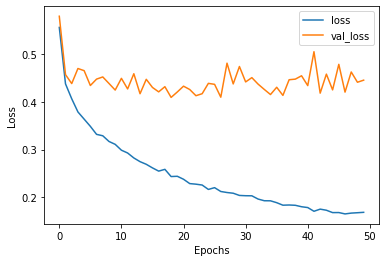

In [9]:
# Plot loss curve
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

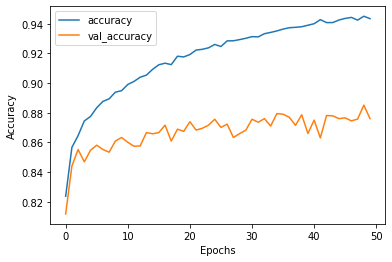

In [10]:
# Plot accuracy curve
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [0]:
# Predict
y_pred = model.predict(X_test).argmax(axis=1)

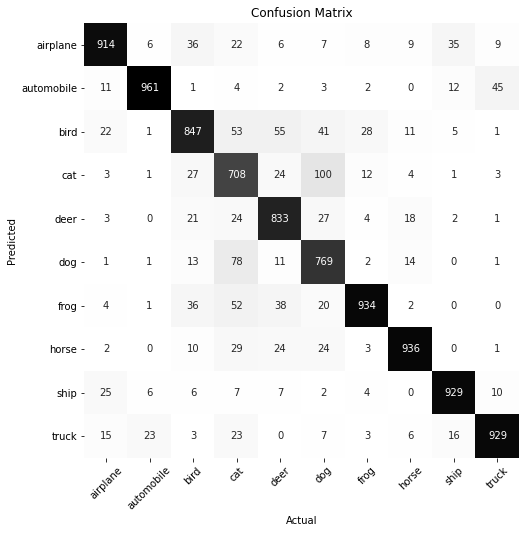

In [16]:
# Plot annotated confusion matrix
cnf_mat = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8,8))

fig = sns.heatmap(cnf_mat.T, square=True, annot=True, fmt='d', cmap='binary', cbar=False)

plt.xlabel('Actual')
ax.set_xticklabels(class_names, rotation=45)

plt.ylabel('Predicted')
ax.set_yticklabels(class_names, rotation=0)

plt.title('Confusion Matrix')

plt.show()

Actual: deer
Predicted: horse




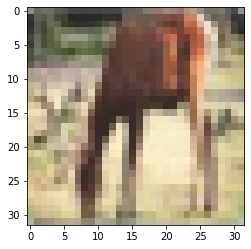

In [21]:
# View misclassified examples
misclassified_idx = np.where(y_pred != y_test)[0]
idx = np.random.choice(misclassified_idx)

print("Actual: {}".format(class_names[y_test[idx]]))
print("Predicted: {}".format(class_names[y_pred[idx]]))
print("\n")

plt.imshow(X_test[idx], cmap='gray')
plt.show()

In [18]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496 